In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# From this we can identify no of missing values of each column
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Correlation**
- This Correlation will help us to identify the relationship of one variable with another variable.
- if two variables are having high correlation(i.e 0.75 to 1 and -0.75 to -1) with one another then we can drop one of the variable
- In the below senario we can just observe how variables are correlated,and we are not omiting any variable as there are only less variables

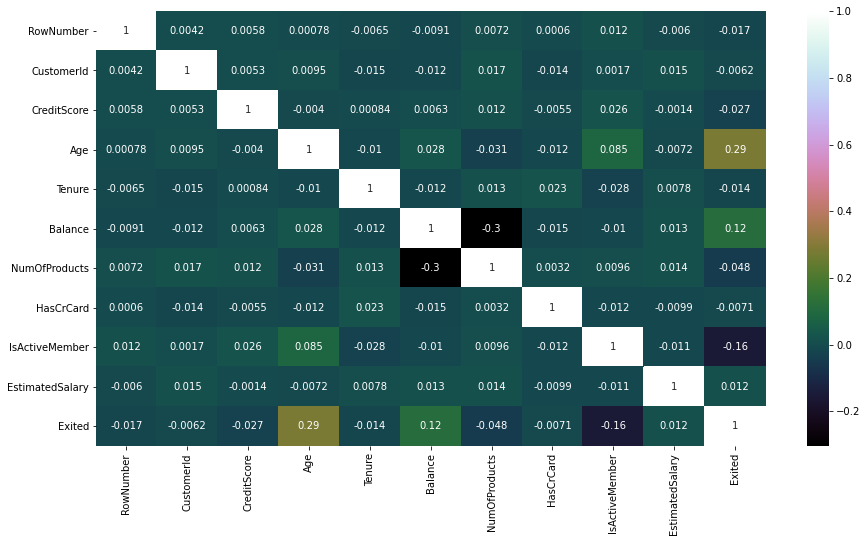

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="cubehelix")

In [9]:
X=df.iloc[:,3:13]
Y=df.iloc[:,13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
X.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

**Applying One hot encoding**

In [12]:
X=pd.get_dummies(X,drop_first=True)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


#### Applying Xgboost Classifier in our case,We can apply different classification Algorithms aswell


**Some keyhighlights about XGBOOST**
- Executes in Parallel fashion i.e construction of tree structure 
- Provides inbuilt Regularisation
- Tree pruning
- Sparse aware algorithm i.e collects non missing entries into buckets
- Hardware Optimisation(cache awareness,out of core)

In [15]:
import xgboost
classifier=xgboost.XGBClassifier()

In [16]:
#validationset Approach
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=200)

In [17]:
mod=classifier.fit(X_train,y_train)
y_pred=mod.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
acc_score=accuracy_score(y_pred,y_test)
print(acc_score)

[[2292  345]
 [  78  285]]
0.859


**Note:Best ML can be used choosen based on applying different algos with Hyperparametes and crossvalidation**

In [20]:
### Hyperparameter tuning and cross validation 

- RandomisedSearchCv is faster when compared to GridSearchCV 
- Here in gridSearchCV ,all the given parameters are tried,but in RandomisedSearchCV values will be selected based on n_iter
- Best combination can be choosen in GridSearchCV than RandomSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [22]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [23]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

- Here in the above we can see cv=5,here it will take Stratified K fold 
- Here, if cv =None ,then default 5 fold cross validation will be pick.

In [24]:
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    8.9s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.5s finished


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [25]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.3,
              min_child_weight=3)

In [26]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [27]:
classifier=xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=5,
              min_child_weight=3)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [29]:
mod=classifier.fit(X_train,y_train)
y_pred=mod.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
acc_score=accuracy_score(y_pred,y_test)
print(acc_score)

[[2309  349]
 [  67  275]]
0.8613333333333333


In [31]:
# You can observe from above that accuracy got improved by using the Hyperparameter tuning and Cross Validation

**K fold Cross validation**
-Here in this we are not using any train_test split simply using the classiflier from the either GridSearchcv or Randomisedsearchcv

In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

In [34]:
score

array([0.869, 0.856, 0.881, 0.865, 0.866, 0.853, 0.863, 0.88 , 0.856,
       0.855])

In [35]:
score.mean()

0.8644000000000001

**Stratified Kfold cross validation**
- We will be using this when we are having our data with imbalanced classification

In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
skf=StratifiedKFold(n_splits=10)

In [39]:
skf.get_n_splits(X, Y)

10

In [40]:
skf.split(X,Y)

<generator object _BaseKFold.split at 0x000001ECF3BAF390>

In [41]:
# From below we can see how train and test split happens
for i,j in skf.split(X,Y):
    print("Element")
    print(i,j)

Element
[1000 1001 1002 ... 9997 9998 9999] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

In [42]:
accuracy=[]

skf=StratifiedKFold(n_splits=10)
skf.get_n_splits(X,Y)
for train_index,test_index in skf.split(X,Y):
    X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
    Y1_train,Y1_test=Y.iloc[train_index],Y.iloc[test_index]
    classifier.fit(X1_train,Y1_train)
    Y1_pred=classifier.predict(X1_test)
    score=accuracy_score(Y1_pred,Y1_test)
    accuracy.append(score)
    
print(accuracy)

[0.869, 0.856, 0.881, 0.865, 0.866, 0.853, 0.863, 0.88, 0.856, 0.855]


In [43]:
import numpy as np
np.array(accuracy).mean()

0.8644000000000001

**Repeated K fold cross validation**

In [45]:
from sklearn.model_selection import RepeatedKFold

In [46]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=10)

In [47]:
score=cross_val_score(classifier,X,Y,cv=cv)

In [50]:
score.mean()

0.8646666666666666

**LOOCV:Leave one out CV**
- Here in this one entry is for testing and rest is for training.
- We make use of all data points, hence the bias will be low
- We repeat the cross validation process n times (where n is number of data points) which results in a higher execution time

In [46]:
from sklearn.model_selection import LeaveOneOut
cv=LeaveOneOut()
score=cross_val_score(classifier,X,Y,cv=cv)
score

KeyboardInterrupt: 